In [1]:
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('../Data/train.csv', index_col=[0])
test = pd.read_csv('../Data/test.csv', index_col=[0])

In [60]:
Xtrain = pd.read_csv('../Data/New/XtrainNew.csv', index_col=[0])
Xtest = pd.read_csv('../Data/New/XtestNew.csv', index_col=[0])

In [61]:
Xtrain.head()

,0
0,really recommend anyone need new player
1,good every day camera fit nicely pocket jean t...
2,dollar dollar dvd player probably best
3,got phone yesterday find problem yet
4,price gb storage


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk as nlp
from nltk.corpus import stopwords

In [63]:
# Obtain list of stopwords
stop_words = set(stopwords.words('english'))

In [64]:
Xtrain['text'] = train.text

In [65]:
Xtrain.iloc[1655,:]

0                 NaN
text    it has it all
Name: 1655, dtype: object

In [66]:
Xtrain.iloc[1655,0] = 'it has it all'

In [67]:
tfidf_vectorizador = TfidfVectorizer(ngram_range = (1,3), stop_words=None ,min_df=0.003)
tfidf_vectorizador.fit(Xtrain['0'])

TfidfVectorizer(min_df=0.003, ngram_range=(1, 3))

In [68]:
Xtrain = tfidf_vectorizador.fit_transform(Xtrain['0'])
Xtest = tfidf_vectorizador.transform(Xtest['0'])

In [69]:
Ytrain = train.label

In [70]:
pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

,ability,able,absolutely,access,accessory,actually,ad,adapter,adjust,adjustment,...,wrong,wrt,xtra,year,yes,yet,zen,zen micro,zen xtra,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.552308,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.424590,0.0,0.0,0.0,0.0
3013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [71]:
Xtrain = pd.DataFrame(Xtrain.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xtrain,Ytrain,test_size= 0.2)

In [73]:
xtrain

,ability,able,absolutely,access,accessory,actually,ad,adapter,adjust,adjustment,...,wrong,wrt,xtra,year,yes,yet,zen,zen micro,zen xtra,zoom
107,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1204,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1612,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1593,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
316,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2140,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1625,0.0,0.0,0.0,0.0,0.0,0.297133,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1873,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
xtrain = asarray(xtrain)
ytrain = asarray(ytrain)
xtest = asarray(xtest)
ytest = asarray(ytest)

In [75]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives +
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

Best Validation Loss: 0.5810
Best Validation f1: 0.8463


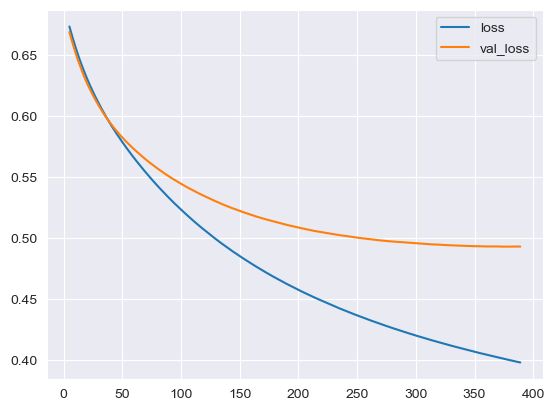

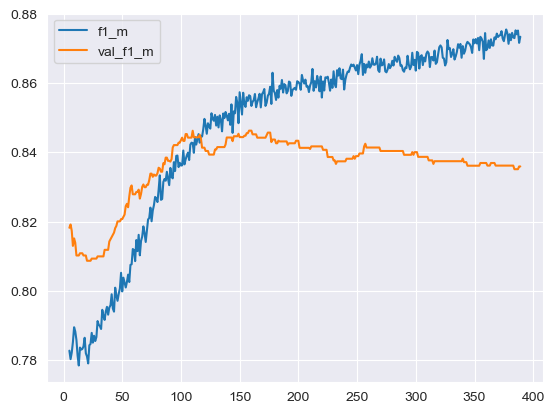

In [77]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

# definimos la red
model = keras.Sequential([
    layers.Dense(1, activation='sigmoid', input_shape=[586]) # umbral por defecto de 0.5
])
# sigmoid nos dice que el problema va a ser de clasificación (1s o 0s)
# la métrica y el tipo de red
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    #metrics=['binary_accuracy']
    metrics=[f1_m],
)
# definimos el early stopping para evitar sobreajuste
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=40, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# lo ajustamos y usamos el test para validar
# definimos un número de épocas alto, porque tenemos early stopping
history = model.fit(
    xtrain, ytrain,
    validation_data=(xtest, ytest),
    batch_size=256,
    epochs=700,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)
# guardamos los datos en un dataframe
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['f1_m', 'val_f1_m']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation f1: {:0.4f}")\
      .format(history_df['f1_m'].min(),
              history_df['val_f1_m'].max()))